# Food Delivery Time — EDA Project


**Dataset:** `Food_Delivery_Times.csv` (uploaded)

**Objective:** Explore factors that influence food delivery time (distance, traffic, weather, courier experience, preparation time, vehicle type, time of day).

## 1. Import libraries

In [2]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 2. Load dataset

In [3]:
# Load the dataset
file_path = "Food_Delivery_Times.csv"
df = pd.read_csv(file_path)

# Quick peek
print('Dataset shape:', df.shape)
display(df.head())

Dataset shape: (1000, 9)


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## 3. Initial inspection

In [4]:
# Info, dtypes, missing values and duplicates
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


None

In [5]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Distance_km,1000.0,NaN,NaN,NaN,10.05997,5.696656,0.59,5.105,10.19,15.0175,19.99
Weather,970,5,Clear,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic_Level,970,3,Medium,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_Day,970,4,Morning,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,1000,3,Bike,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preparation_Time_min,1000.0,NaN,NaN,NaN,16.982,7.204553,5.0,11.0,17.0,23.0,29.0
Courier_Experience_yrs,970.0,NaN,NaN,NaN,4.579381,2.914394,0.0,2.0,5.0,7.0,9.0
Delivery_Time_min,1000.0,NaN,NaN,NaN,56.732,22.070915,8.0,41.0,55.5,71.0,153.0


In [6]:
print('\nMissing values per column:\n', df.isnull().sum())


Missing values per column:
 Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [7]:
print('\nDuplicate rows:', df.duplicated().sum())


Duplicate rows: 0


## 4. Data cleaning & preprocessing
- Handle missing values
- Convert types if necessary
- Remove duplicates
- Create any derived columns (e.g., speed_estimate)


In [8]:
# 1) Drop duplicates
df_clean = df.copy()
initial_shape = df_clean.shape
df_clean.drop_duplicates(inplace=True)
print('Dropped', initial_shape[0] - df_clean.shape[0], 'duplicate rows')

Dropped 0 duplicate rows


In [9]:
# 2) Missing values summary
missing_summary = df_clean.isnull().sum()
display(missing_summary)

# Columns
num_cols = df_clean.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object','category']).columns.tolist()

# Fill numerical with median
for c in num_cols:
    if df_clean[c].isnull().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

# Fill categorical with mode
for c in cat_cols:
    if df_clean[c].isnull().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [10]:
# 3) Convert types
if 'Order_ID' in df_clean.columns:
    df_clean['Order_ID'] = df_clean['Order_ID'].astype(str)

In [11]:
# 4) Derived features
if 'Preparation_Time_min' in df_clean.columns and 'Delivery_Time_min' in df_clean.columns:
    df_clean['Total_Process_Time_min'] = (
        df_clean['Preparation_Time_min'] + df_clean['Delivery_Time_min']
    )

# Speed feature
if 'Distance_km' in df_clean.columns and 'Delivery_Time_min' in df_clean.columns:
    df_clean['Speed_km_per_min'] = (
        df_clean['Distance_km'] / df_clean['Delivery_Time_min'].replace(0, np.nan)
    )

print('\nAfter cleaning, shape:', df_clean.shape)
display(df_clean.head())


After cleaning, shape: (1000, 11)


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Total_Process_Time_min,Speed_km_per_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,55,0.184419
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,104,0.195476
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,87,0.161356
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,42,0.201081
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,84,0.279853


## 5. Descriptive statistics

In [12]:
# Descriptive stats for numeric columns
display(df_clean[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Distance_km,1000.0,10.05997,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.98200,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,1000.0,4.59200,2.871198,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.73200,22.070915,8.00,41.000,55.50,71.0000,153.00


In [13]:
# Frequency counts for categorical columns
for c in cat_cols:
    print('\nValue counts for', c)
    display(df_clean[c].value_counts().head(20))


Value counts for Weather


Weather
Clear    500
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64


Value counts for Traffic_Level


Traffic_Level
Medium    420
Low       383
High      197
Name: count, dtype: int64


Value counts for Time_of_Day


Time_of_Day
Morning      338
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64


Value counts for Vehicle_Type


Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

## 6. Data Visualization
- Histograms, boxplots, scatter plots, heatmap for correlations


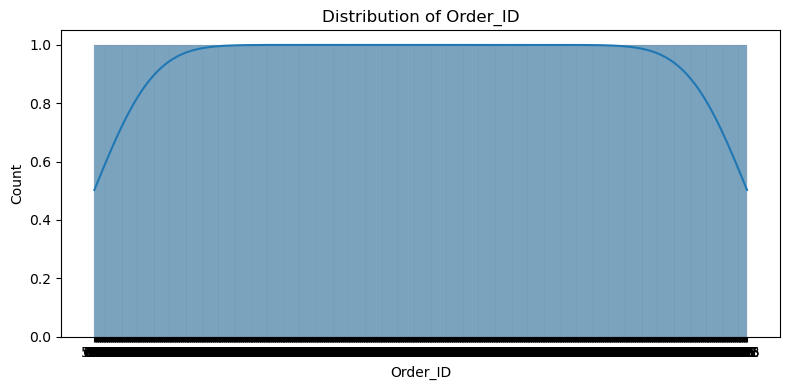

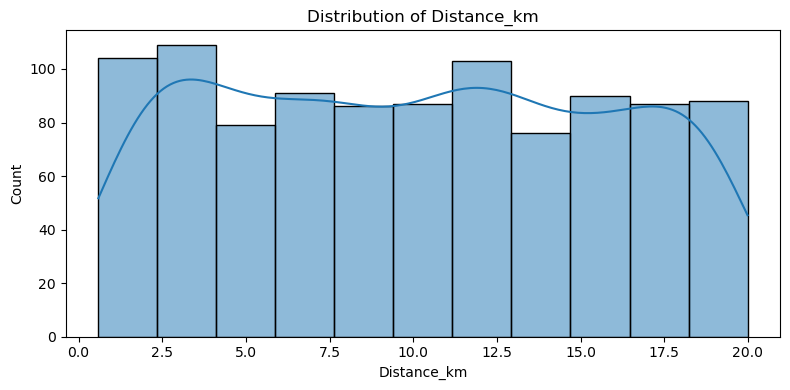

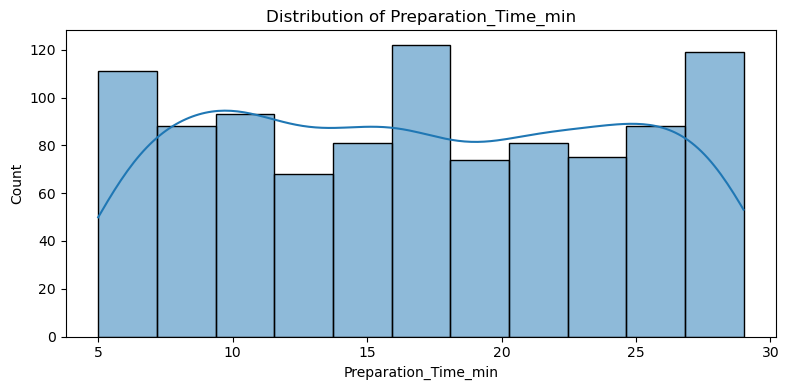

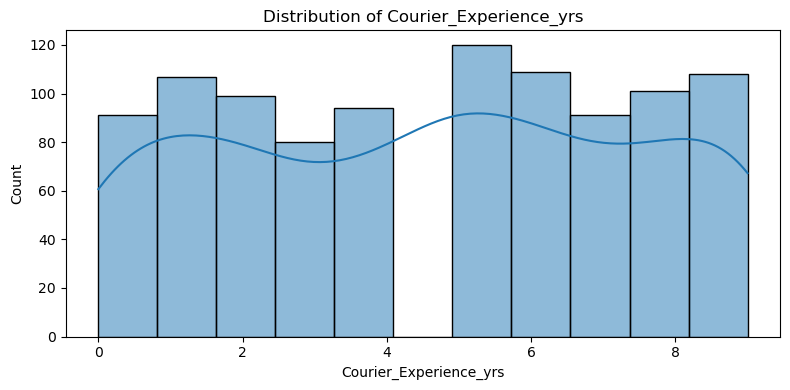

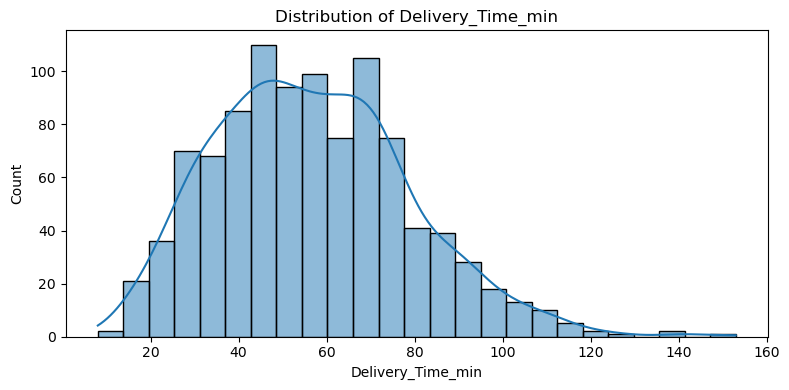

In [18]:
# Histograms for numerical features
for c in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean[c].dropna(), kde=True)
    plt.title(f'Distribution of {c}')
    plt.xlabel(c)
    plt.tight_layout()
    plt.show()

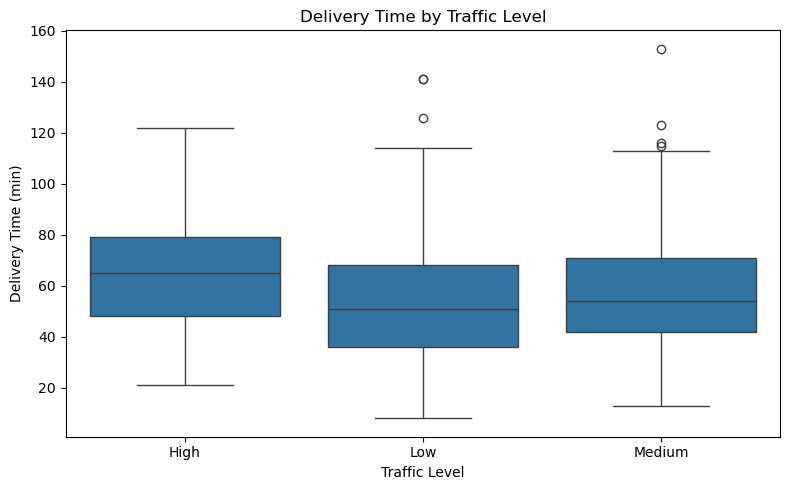

In [19]:
# Boxplot: Delivery time by Traffic level
if 'Traffic_Level' in df_clean.columns and 'Delivery_Time_min' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', data=df_clean, order=sorted(df_clean['Traffic_Level'].unique()))
    plt.title('Delivery Time by Traffic Level')
    plt.xlabel('Traffic Level')
    plt.ylabel('Delivery Time (min)')
    plt.tight_layout()
    plt.show()


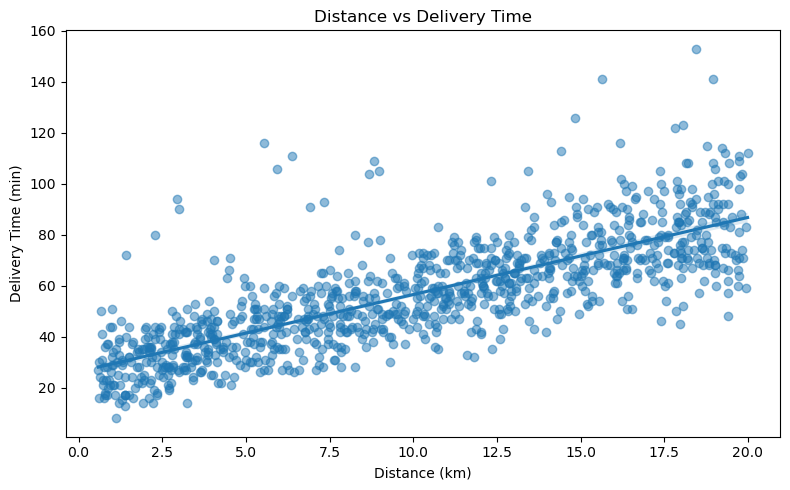

In [20]:
# Scatter: Distance vs Delivery Time with regression line
if 'Distance_km' in df_clean.columns and 'Delivery_Time_min' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.regplot(x='Distance_km', y='Delivery_Time_min', data=df_clean, scatter_kws={'alpha':0.5})
    plt.title('Distance vs Delivery Time')
    plt.xlabel('Distance (km)')
    plt.ylabel('Delivery Time (min)')
    plt.tight_layout()
    plt.show()

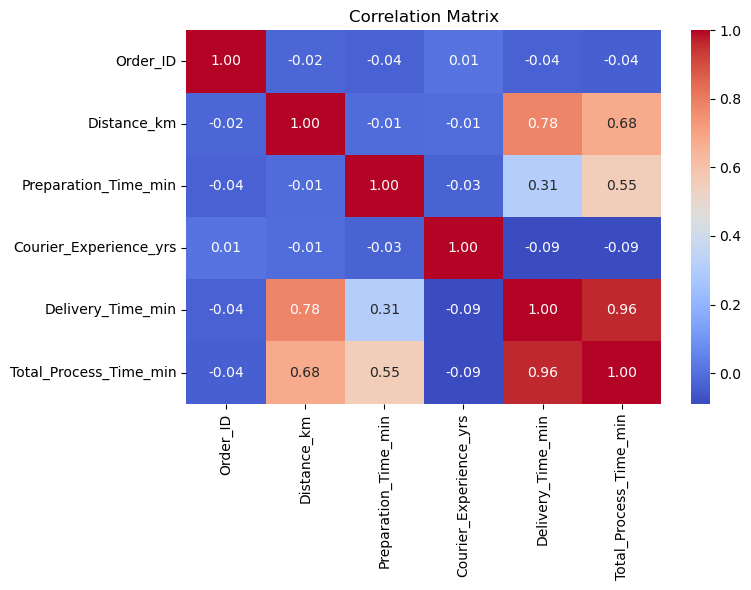

In [21]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
corr = df_clean[num_cols + ['Total_Process_Time_min'] if 'Total_Process_Time_min' in df_clean.columns else num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 7. Group analysis
- Aggregate average delivery time by Traffic, Weather, Time_of_Day, Vehicle_Type


In [17]:
group_cols = ['Traffic_Level', 'Weather', 'Time_of_Day', 'Vehicle_Type']
for col in group_cols:
    if col in df_clean.columns:
        print('\nAverage delivery time by', col)
        display(df_clean.groupby(col)['Delivery_Time_min'].agg(['count','mean','median','std']).sort_values('mean', ascending=False).head(20))


Average delivery time by Traffic_Level


,count,mean,median,std
Traffic_Level,,,,
High,197,64.807107,65.0,21.869356
Medium,420,56.452381,54.0,21.558714
Low,383,52.885117,51.0,21.683646



Average delivery time by Weather


,count,mean,median,std
Weather,,,,
Snowy,97,67.113402,66.0,21.291565
Rainy,204,59.794118,57.5,22.822441
Foggy,103,59.466019,59.0,20.862207
Windy,96,55.458333,55.0,21.777785
Clear,500,53.150000,52.0,21.386122



Average delivery time by Time_of_Day


,count,mean,median,std
Time_of_Day,,,,
Evening,293,57.481229,56.0,22.176375
Morning,338,57.011834,56.5,22.991158
Afternoon,284,56.080986,56.0,21.085987
Night,85,55.211765,52.0,21.426560



Average delivery time by Vehicle_Type


,count,mean,median,std
Vehicle_Type,,,,
Car,195,58.200000,56.0,22.521376
Bike,503,56.574553,56.0,22.190544
Scooter,302,56.046358,54.5,21.602675


## 8. Advanced Python Techniques
- Lambda functions, user-defined functions, list comprehensions


In [25]:
# Lambda: categorize delivery speed based on Delivery_Time_min
if 'Delivery_Time_min' in df_clean.columns:
    df_clean['Speed_Category'] = df_clean['Delivery_Time_min'].apply(lambda x: 'Fast' if x <= df_clean['Delivery_Time_min'].quantile(0.25) else ('Slow' if x >= df_clean['Delivery_Time_min'].quantile(0.75) else 'Average'))
    display(df_clean[['Delivery_Time_min','Speed_Category']].head())

,Delivery_Time_min,Speed_Category
0,43,Average
1,84,Slow
2,59,Average
3,37,Fast
4,68,Average


In [26]:
# User-defined function: courier experience bucket
def experience_bucket(years):
    if years < 1:
        return 'Trainee'
    elif years <= 3:
        return 'Intermediate'
    else:
        return 'Expert'

if 'Courier_Experience_yrs' in df_clean.columns:
    df_clean['Experience_Level'] = df_clean['Courier_Experience_yrs'].apply(experience_bucket)
    display(df_clean[['Courier_Experience_yrs','Experience_Level']].head())

,Courier_Experience_yrs,Experience_Level
0,1.0,Intermediate
1,2.0,Intermediate
2,1.0,Intermediate
3,1.0,Intermediate
4,5.0,Expert


In [27]:
# List comprehension: columns with missing values
missing_cols = [c for c in df_clean.columns if df_clean[c].isnull().sum() > 0]
print('Columns with missing values:', missing_cols)

Columns with missing values: []


## 9. Insights & Conclusions

Write observations here based on the analysis. Example conclusions to consider:

- Traffic Level and Weather significantly affect Delivery Time.
- Distance and Preparation Time are positively correlated with Delivery Time.
- More experienced couriers tend to have slightly lower delivery times.

**Possible next steps:** build a predictive model (regression) to estimate delivery time, or cluster couriers/customers by behavior.


## 10. Save cleaned data 

In [10]:
# Save cleaned dataset for later use
out_path = 'Downloads'
df_clean.to_csv(out_path, index=False)
print('Saved cleaned dataset to', out_path)

Saved cleaned dataset to Downloads
